# EDA for Ball-to-Ball Cricket Data

The file './data/ball_to_ball/deliveries.csv' contains ball-to-ball data and './data/match_id/matches.csv' contains summaries for cricket matches. This notebook explores the data to gain insights into match performance, trends, and patterns.

## Data Loading and Preparation

In this section, we set up the environment by importing necessary libraries and loading the datasets required for analysis.

### Importing Libraries

We import libraries for system operations, data manipulation, and visualization to support the EDA process.

In [4]:
# System imports
import os
import sys
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Data

We load the configuration file to access data paths and read the ball-to-ball and match data into DataFrames.

In [5]:
# Loading Configurations
# ----------------------
with open('config.json') as f:
    config_data = json.load(f)

# Getting data path
ball_data_path = config_data["data"]["ball_to_ball"]
match_data_path = config_data["data"]["match_data"]

# Getting the data
# ----------------
ball_data = pd.read_csv(ball_data_path)
match_data = pd.read_csv(match_data_path)

# Getting columns of the data
# ---------------------------
ball_data_columns = ball_data.columns
match_data_columns = match_data.columns
print(ball_data_columns)
print(match_data_columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')
Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')


The `ball_data` DataFrame contains detailed delivery-by-delivery information, while `match_data` provides overall match details, such as teams, venues, and outcomes.

## Season-wise Analysis

This section examines performance trends across different seasons by grouping matches and analyzing ball data seasonally.

### Grouping Matches by Season

We create a dictionary mapping each season to its match IDs and split the ball data accordingly.

In [6]:
# Create a dictionary mapping each season to its list of match ids
year_match_dict = {
    season: match_data[match_data['season'] == season]['id'].tolist()
    for season in match_data['season'].unique()
}
# Divide ball_data by season based on the match_ids from match_data
ball_data_by_season = {
    season: ball_data[ball_data['match_id'].isin(match_ids)]
    for season, match_ids in year_match_dict.items()
}

# Optionally, print the keys to verify the seasons
print(list(ball_data_by_season.keys()))


['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022', '2023', '2024']


### Analyzing Season-wise Metrics

For each season, we aggregate data by match and inning to compute total runs, wickets, and run rates, then visualize these metrics with histograms.

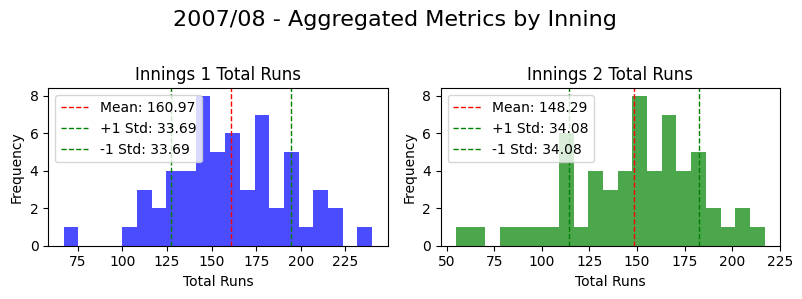

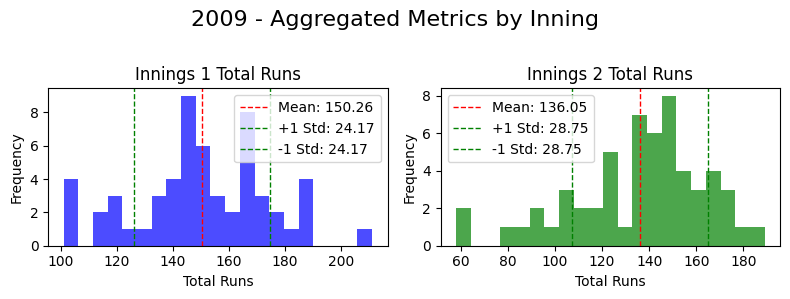

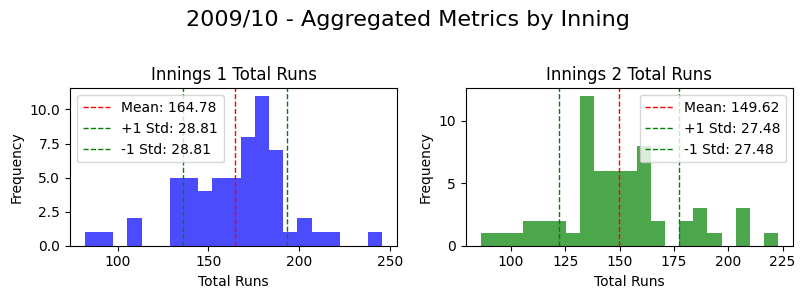

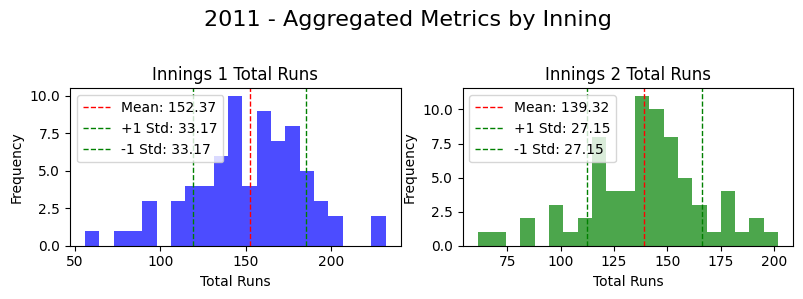

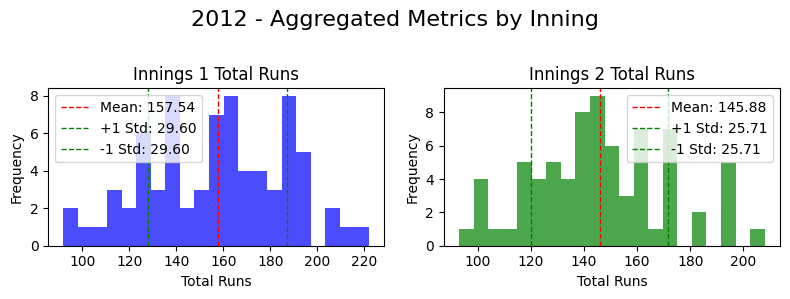

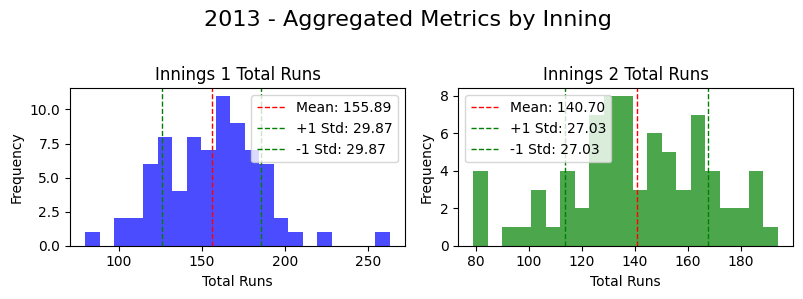

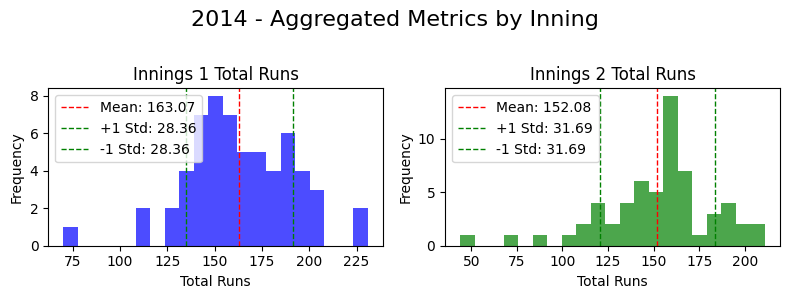

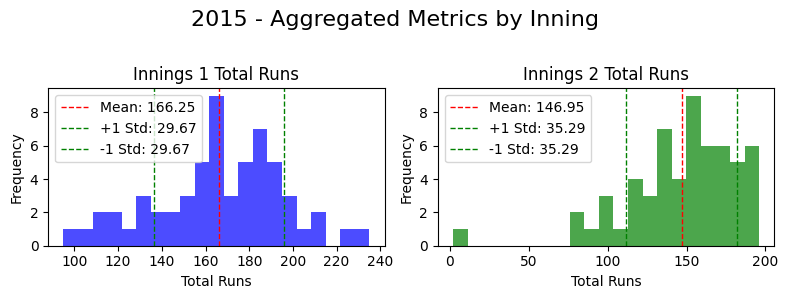

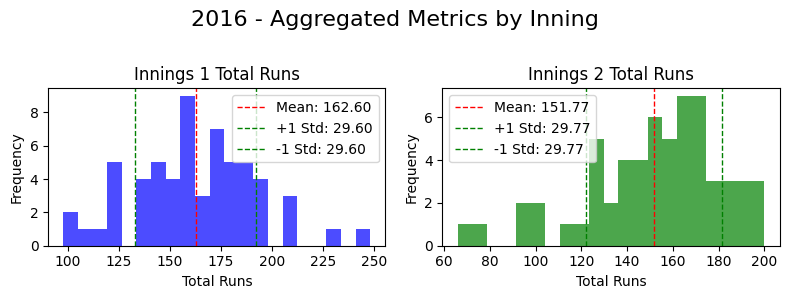

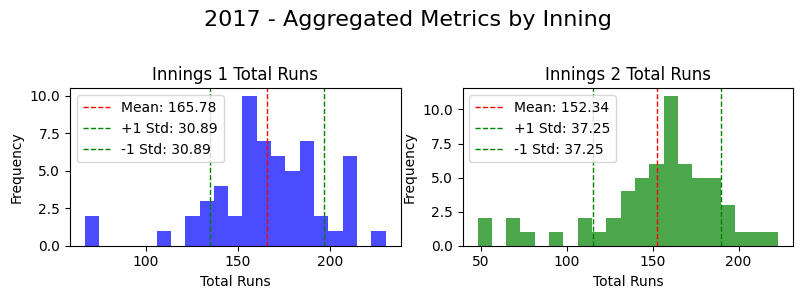

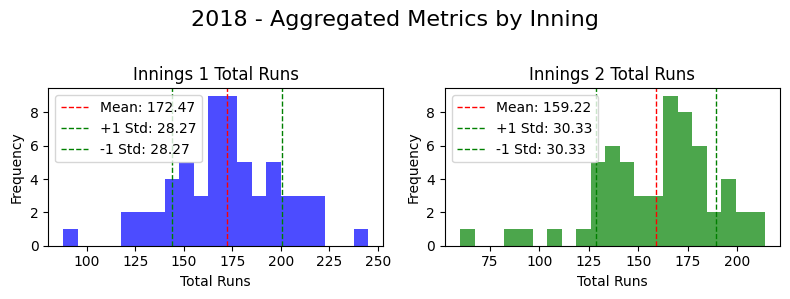

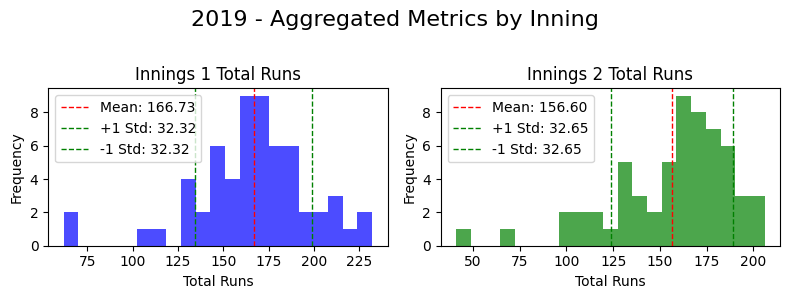

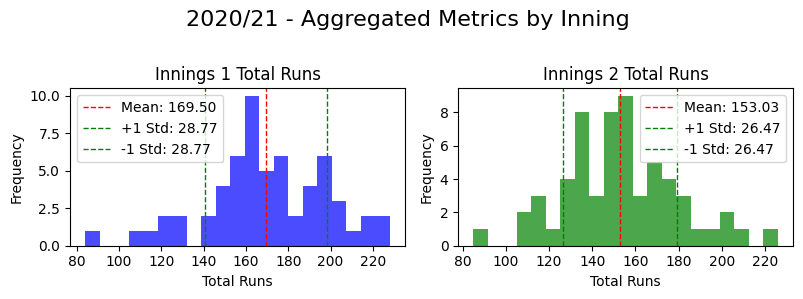

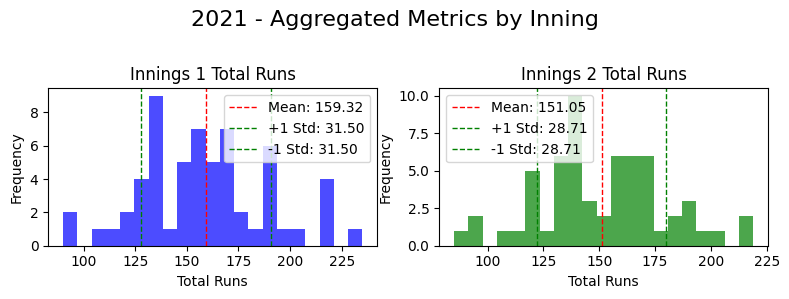

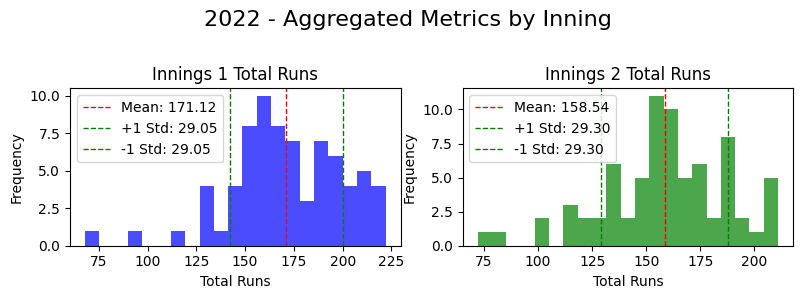

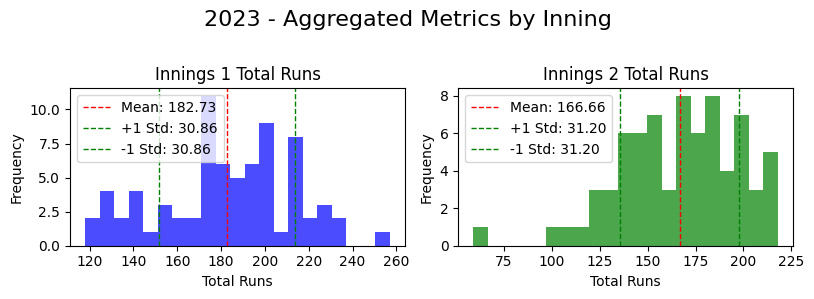

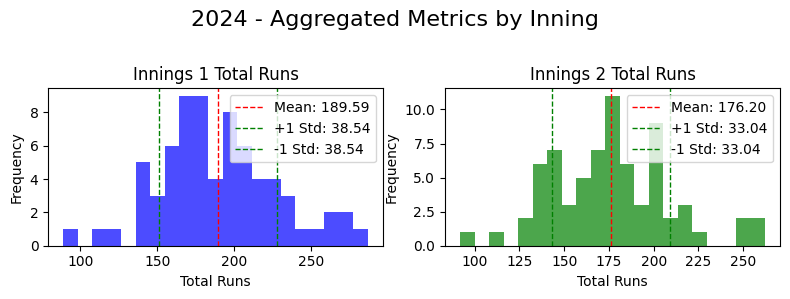

In [7]:
season_mean_inning = pd.array([[],[]])
runrate_mean_inning = pd.array([[],[]])

for season, df in ball_data_by_season.items():
    # Group and aggregate metrics for each inning including maximum over for run rate calculation
    aggr_inning1 = df[df['inning'] == 1].groupby('match_id').agg({
        'total_runs': 'sum',
        'batsman_runs': 'sum',
        'extra_runs': 'sum',
        'is_wicket': 'sum',
        'over': 'max'
    }).reset_index()
    
    aggr_inning2 = df[df['inning'] == 2].groupby('match_id').agg({
        'total_runs': 'sum',
        'batsman_runs': 'sum',
        'extra_runs': 'sum',
        'is_wicket': 'sum',
        'over': 'max'
    }).reset_index()
    
    # Compute run rate for each match (assuming over index starting at 0 so add 1)
    aggr_inning1['run_rate'] = aggr_inning1['total_runs'] / (aggr_inning1['over'] + 1)
    aggr_inning2['run_rate'] = aggr_inning2['total_runs'] / (aggr_inning2['over'] + 1)
    
    # Create a figure with three subplots: Inning 1, Inning 2 total runs, and Run Rate distribution
    fig, axes = plt.subplots(1,2, figsize=(8, 3))
    fig.suptitle(f'{season} - Aggregated Metrics by Inning', fontsize=16)
    
    # Inning 1: Total Runs
    axes[0].hist(aggr_inning1['total_runs'], bins=21, color='blue', alpha=0.7)
    m1 = aggr_inning1['total_runs'].mean()
    std1 = aggr_inning1['total_runs'].std()
    axes[0].axvline(m1, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {m1:.2f}")
    axes[0].axvline(m1 + std1, color='green', linestyle='dashed', linewidth=1, label=f"+1 Std: {std1:.2f}")
    axes[0].axvline(m1 - std1, color='green', linestyle='dashed', linewidth=1, label=f"-1 Std: {std1:.2f}")
    axes[0].set_title('Innings 1 Total Runs')
    axes[0].set_xlabel('Total Runs')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    season_mean_inning[0].append(m1)
    
    # Inning 2: Total Runs
    axes[1].hist(aggr_inning2['total_runs'], bins=21, color='green', alpha=0.7)
    m2 = aggr_inning2['total_runs'].mean()
    std2 = aggr_inning2['total_runs'].std()
    axes[1].axvline(m2, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {m2:.2f}")
    axes[1].axvline(m2 + std2, color='green', linestyle='dashed', linewidth=1, label=f"+1 Std: {std2:.2f}")
    axes[1].axvline(m2 - std2, color='green', linestyle='dashed', linewidth=1, label=f"-1 Std: {std2:.2f}")
    axes[1].set_title('Innings 2 Total Runs')
    axes[1].set_xlabel('Total Runs')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    season_mean_inning[1].append(m2)
    
    # # Third subplot: Run Rate distribution for both innings
    # axes[2].hist(aggr_inning1['run_rate'], bins=21, color='blue', alpha=0.5, label='Innings 1')
    # axes[2].hist(aggr_inning2['run_rate'], bins=21, color='green', alpha=0.5, label='Innings 2')
    m_rr1 = aggr_inning1['run_rate'].mean()
    m_rr2 = aggr_inning2['run_rate'].mean()
    # axes[2].axvline(m_rr1, color='blue', linestyle='dashed', linewidth=1, label=f'Innings 1 Mean: {m_rr1:.2f}')
    # axes[2].axvline(m_rr2, color='green', linestyle='dashed', linewidth=1, label=f'Innings 2 Mean: {m_rr2:.2f}')
    # axes[2].set_title('Run Rate Distribution')
    # axes[2].set_xlabel('Run Rate')
    # axes[2].set_ylabel('Frequency')
    # axes[2].legend()
    runrate_mean_inning[0].append(m_rr1)
    runrate_mean_inning[1].append(m_rr2)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

### Plotting Yearly Trends

We visualize the mean total runs and run rates per match across years to identify long-term trends.

<Figure size 1200x600 with 0 Axes>

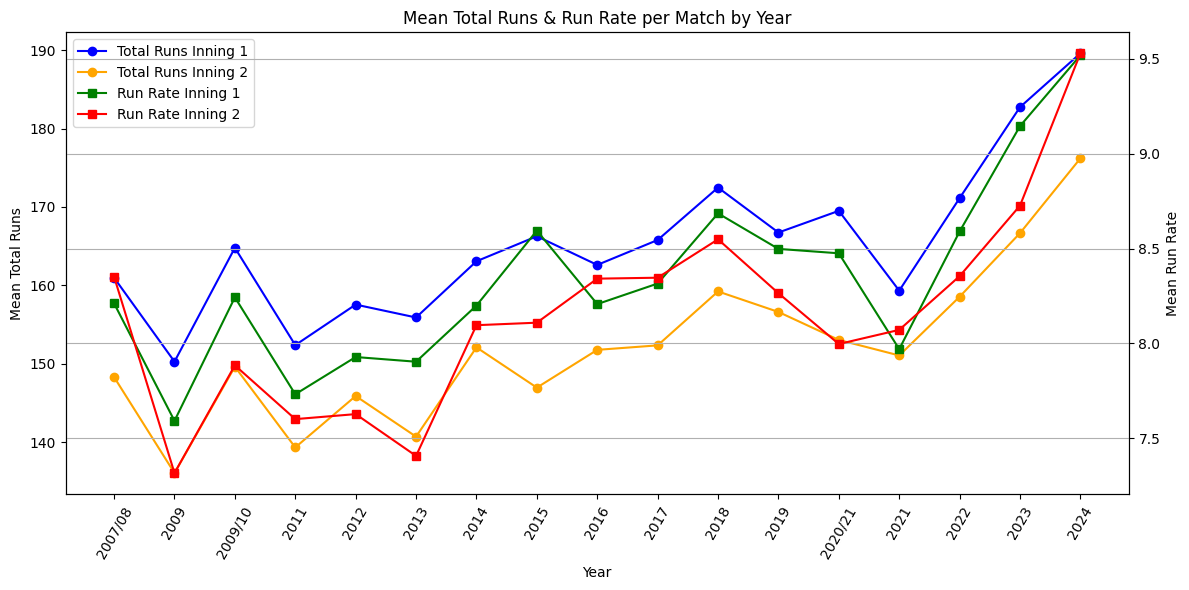

In [8]:


years = list(ball_data_by_season.keys())
plt.figure(figsize=(12, 6))
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot mean total runs on the primary y-axis
ax1.plot(years, season_mean_inning[0], marker='o', label='Total Runs Inning 1', color='blue')
ax1.plot(years, season_mean_inning[1], marker='o', label='Total Runs Inning 2', color='orange')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Total Runs', color='black')
ax1.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=60)

# Create secondary y-axis for mean run rate
ax2 = ax1.twinx()
ax2.plot(years, runrate_mean_inning[0], marker='s', label='Run Rate Inning 1', color='green')
ax2.plot(years, runrate_mean_inning[1], marker='s', label='Run Rate Inning 2', color='red')
ax2.set_ylabel('Mean Run Rate', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Mean Total Runs & Run Rate per Match by Year')
plt.tight_layout()
plt.grid(visible=True,which='both')
plt.show()

## Innings-wise Analysis

Here, we aggregate data by match and inning across all seasons to compare performance between the first and second innings.

### Aggregating and Visualizing Innings Data

We group the ball data by match and inning, calculate key metrics, and plot histograms for total runs and wickets.

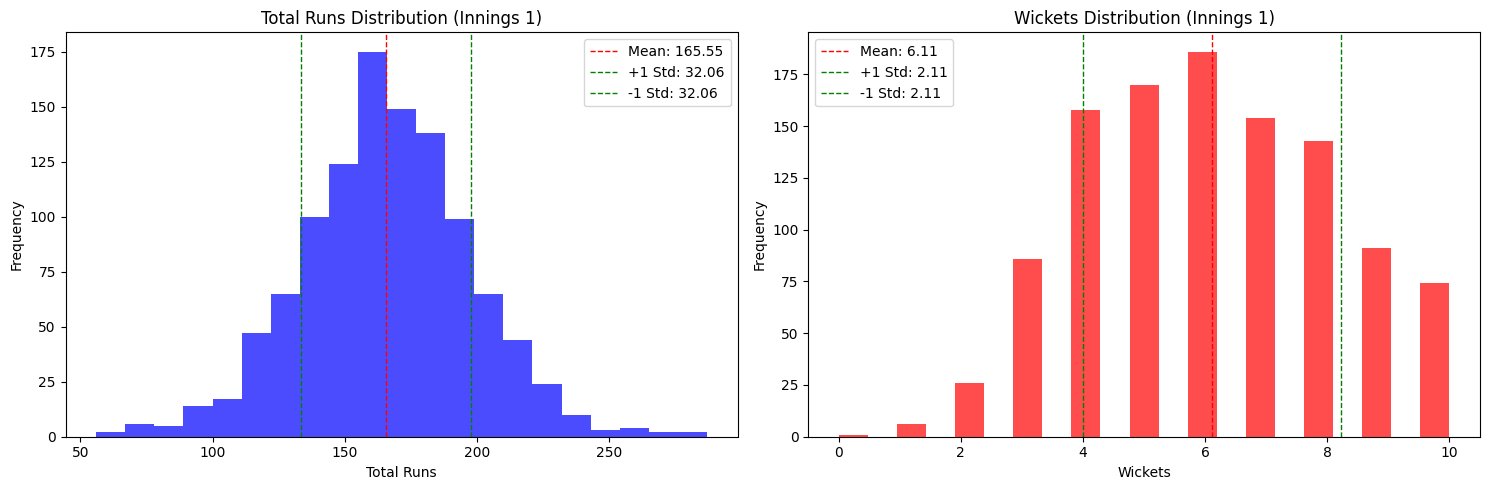

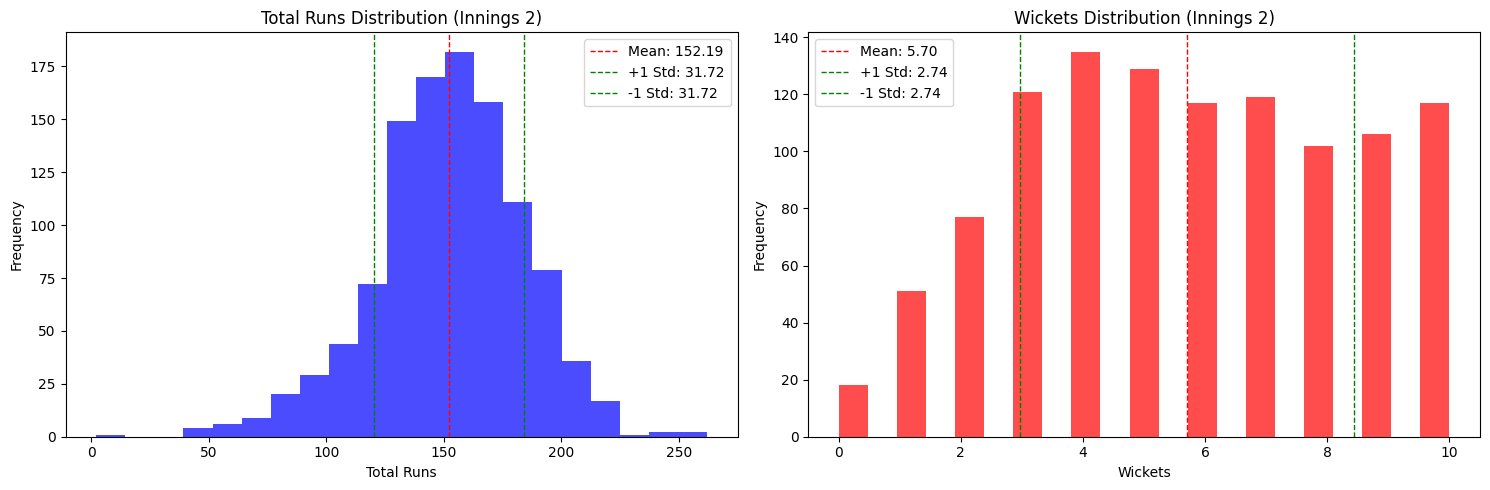

Innings 1 statistics:
Mean Total Runs: 165.54703196347032
Standard Deviation Total Runs: 32.062771612098935
Mean Wickets: 6.114155251141552
Standard Deviation Wickets: 2.1147887455719787

Innings 2 statistics:
Mean Total Runs: 152.19413919413918
Standard Deviation Total Runs: 31.72086728267123
Mean Wickets: 5.7032967032967035
Standard Deviation Wickets: 2.736498081928755


In [9]:
# Grouping data by match_id and inning
aggregated_data = ball_data.groupby(['match_id', 'inning']).agg({
    'total_runs': 'sum',
    'batsman_runs': 'sum',
    'extra_runs': 'sum',
    'is_wicket': 'sum',
}).reset_index()

# Filter data for innings 1 and innings 2
inning1_data = aggregated_data[aggregated_data['inning'] == 1]
inning2_data = aggregated_data[aggregated_data['inning'] == 2]



# Plotting the data for innings 1
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Total runs histogram for innings 1
axes[0].hist(inning1_data['total_runs'], bins=21, color='blue', alpha=0.7)
mean_total1 = inning1_data['total_runs'].mean()
std_total1 = inning1_data['total_runs'].std()
axes[0].axvline(mean_total1, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_total1:.2f}")
axes[0].axvline(mean_total1 + std_total1, color='green', linestyle='dashed', linewidth=1, label=f"+1 Std: {std_total1:.2f}")
axes[0].axvline(mean_total1 - std_total1, color='green', linestyle='dashed', linewidth=1, label=f"-1 Std: {std_total1:.2f}")
axes[0].set_title('Total Runs Distribution (Innings 1)')
axes[0].set_xlabel('Total Runs')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Wickets histogram for innings 1
axes[1].hist(inning1_data['is_wicket'], bins=21, color='red', alpha=0.7)
mean_wick1 = inning1_data['is_wicket'].mean()
std_wick1 = inning1_data['is_wicket'].std()
axes[1].axvline(mean_wick1, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_wick1:.2f}")
axes[1].axvline(mean_wick1 + std_wick1, color='green', linestyle='dashed', linewidth=1, label=f"+1 Std: {std_wick1:.2f}")
axes[1].axvline(mean_wick1 - std_wick1, color='green', linestyle='dashed', linewidth=1, label=f"-1 Std: {std_wick1:.2f}")
axes[1].set_title('Wickets Distribution (Innings 1)')
axes[1].set_xlabel('Wickets')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

# Plotting the data for innings 2
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Total runs histogram for innings 2
axes[0].hist(inning2_data['total_runs'], bins=21, color='blue', alpha=0.7)
mean_total2 = inning2_data['total_runs'].mean()
std_total2 = inning2_data['total_runs'].std()
axes[0].axvline(mean_total2, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_total2:.2f}")
axes[0].axvline(mean_total2 + std_total2, color='green', linestyle='dashed', linewidth=1, label=f"+1 Std: {std_total2:.2f}")
axes[0].axvline(mean_total2 - std_total2, color='green', linestyle='dashed', linewidth=1, label=f"-1 Std: {std_total2:.2f}")
axes[0].set_title('Total Runs Distribution (Innings 2)')
axes[0].set_xlabel('Total Runs')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Wickets histogram for innings 2
axes[1].hist(inning2_data['is_wicket'], bins=21, color='red', alpha=0.7)
mean_wick2 = inning2_data['is_wicket'].mean()
std_wick2 = inning2_data['is_wicket'].std()
axes[1].axvline(mean_wick2, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_wick2:.2f}")
axes[1].axvline(mean_wick2 + std_wick2, color='green', linestyle='dashed', linewidth=1, label=f"+1 Std: {std_wick2:.2f}")
axes[1].axvline(mean_wick2 - std_wick2, color='green', linestyle='dashed', linewidth=1, label=f"-1 Std: {std_wick2:.2f}")
axes[1].set_title('Wickets Distribution (Innings 2)')
axes[1].set_xlabel('Wickets')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

# Calculate and print the mean and standard deviation for innings 1
print("Innings 1 statistics:")
print("Mean Total Runs:", mean_total1)
print("Standard Deviation Total Runs:", std_total1)
print("Mean Wickets:", mean_wick1)
print("Standard Deviation Wickets:", std_wick1)
print()

# Calculate and print the mean and standard deviation for innings 2
print("Innings 2 statistics:")
print("Mean Total Runs:", mean_total2)
print("Standard Deviation Total Runs:", std_total2)
print("Mean Wickets:", mean_wick2)
print("Standard Deviation Wickets:", std_wick2)

## Per Ball Analysis

This section explores the distribution of individual delivery outcomes across the dataset.

### Analyzing Delivery Outcomes

We compute value counts for each column and visualize them with histograms or bar charts based on the data type.

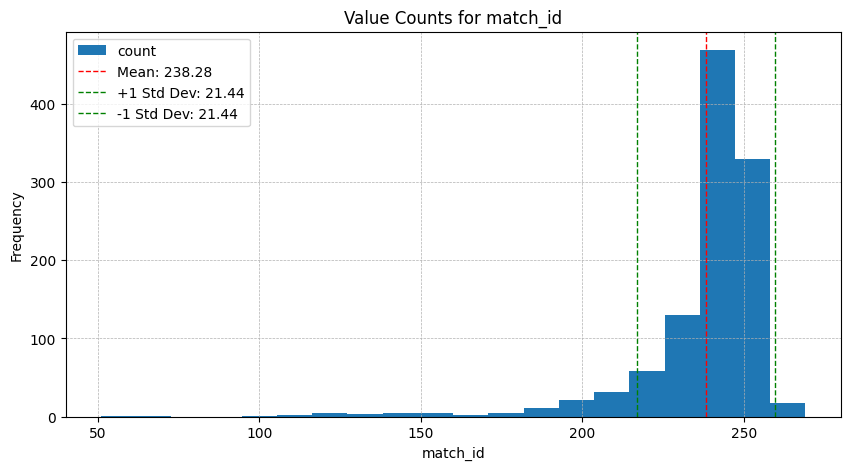

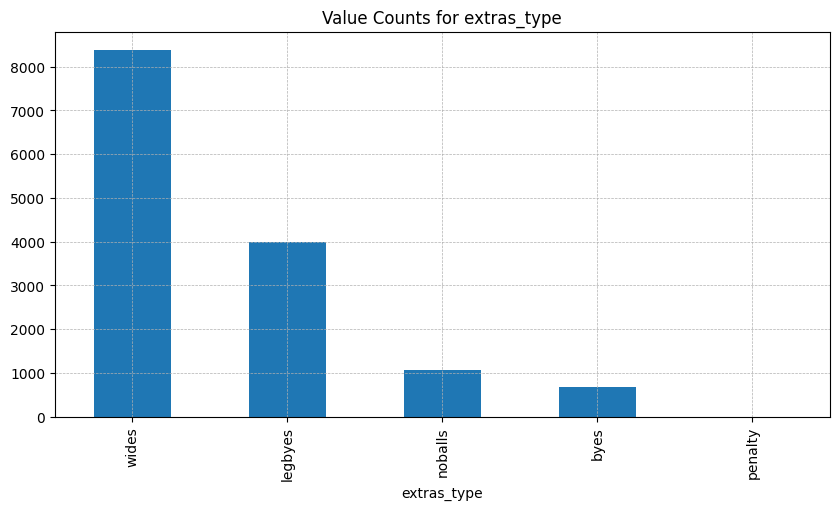

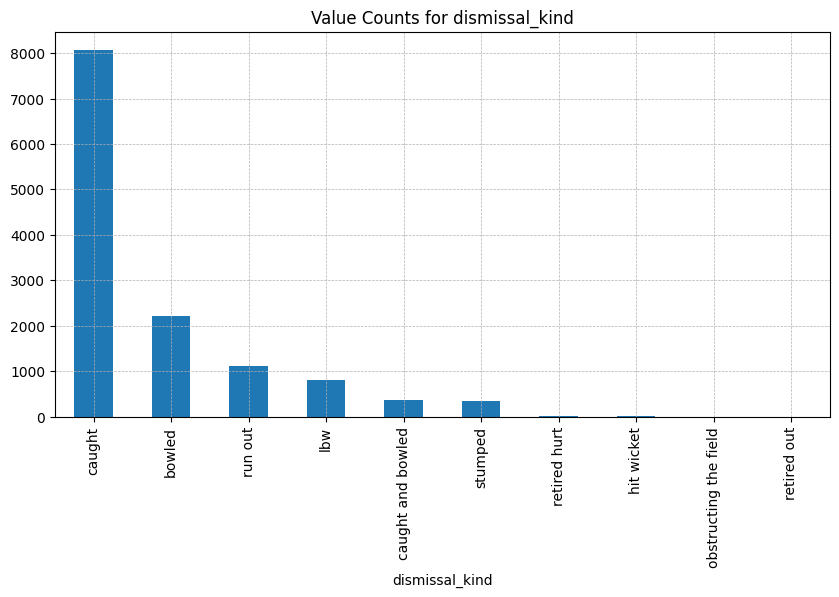

In [10]:
# Per Ball Analysis
# ------------------
value_counts = {col: ball_data[col].value_counts() for col in ball_data.columns}
for col, counts in value_counts.items():
    if col in ['match_id']:
        counts.plot(kind='hist', bins=20, figsize=(10, 5), title=f"Value Counts for {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.axvline(counts.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {counts.mean():.2f}')
        std_dev = counts.var()**0.5
        plt.axvline(counts.mean() + std_dev, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {std_dev:.2f}')
        plt.axvline(counts.mean() - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {std_dev:.2f}')
        plt.grid(visible=True,which='both',linestyle='--',linewidth=0.5)
        plt.legend()
    elif col in ['extras_type', 'dismissal_kind']:
        counts.plot(kind='bar', figsize=(10, 5), title=f"Value Counts for {col}")
        plt.grid(visible=True,which='both',linestyle='--',linewidth=0.5)
    plt.show()

## Venue Effect Analysis

We investigate how different venues influence match outcomes by analyzing average runs per inning.

### Analyzing Venue Impact

We merge venue data with aggregated runs, shorten venue names for clarity, and plot average runs by venue and inning.

Venue Name				Shortened Name
----------------------------------------------------------------------------------------------------
M Chinnaswamy Stadium                                        MCS
Punjab Cricket Association Stadium, Mohali                   PCASM
Feroz Shah Kotla                                             FSK
Wankhede Stadium                                             WS
Eden Gardens                                                 EG
Sawai Mansingh Stadium                                       SMS
Rajiv Gandhi International Stadium, Uppal                    RGISU
MA Chidambaram Stadium, Chepauk                              MCSC
Dr DY Patil Sports Academy                                   DDPSA
Newlands                                                     N
St George's Park                                             SGP
Kingsmead                                                    K
SuperSport Park                                              SP
Buffalo Park             

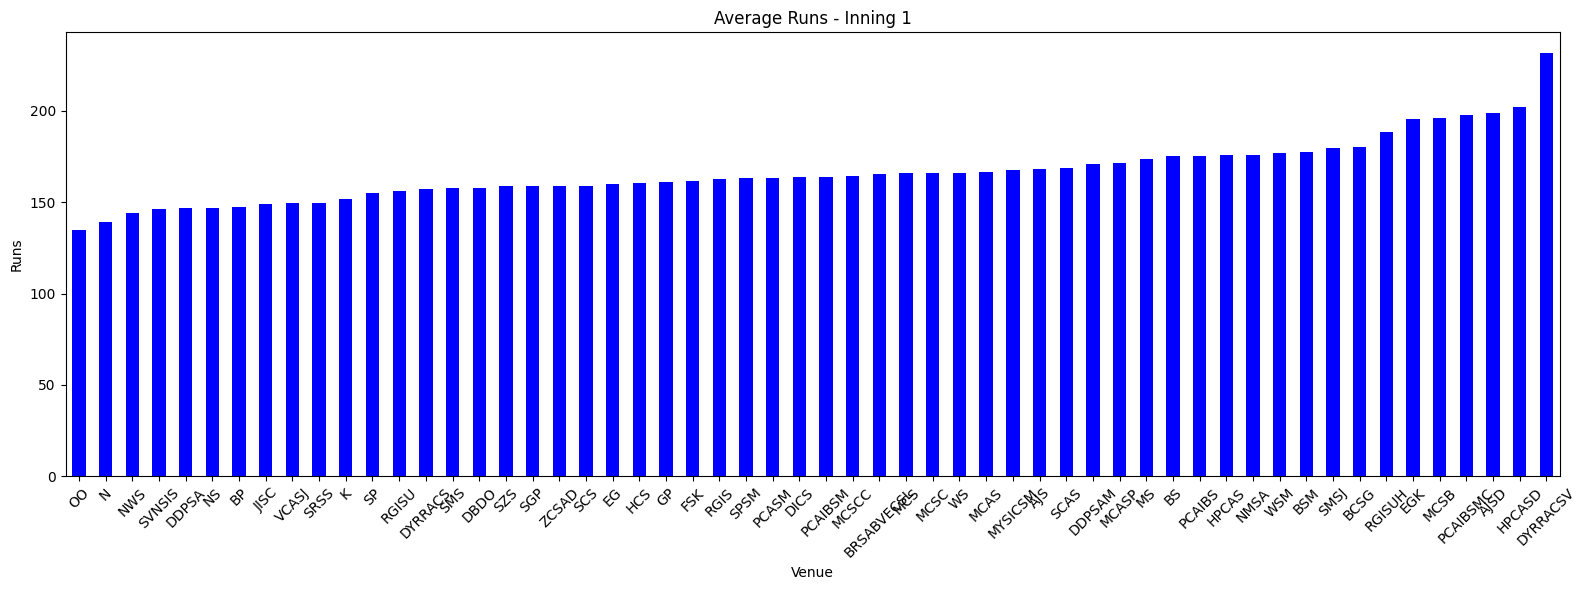

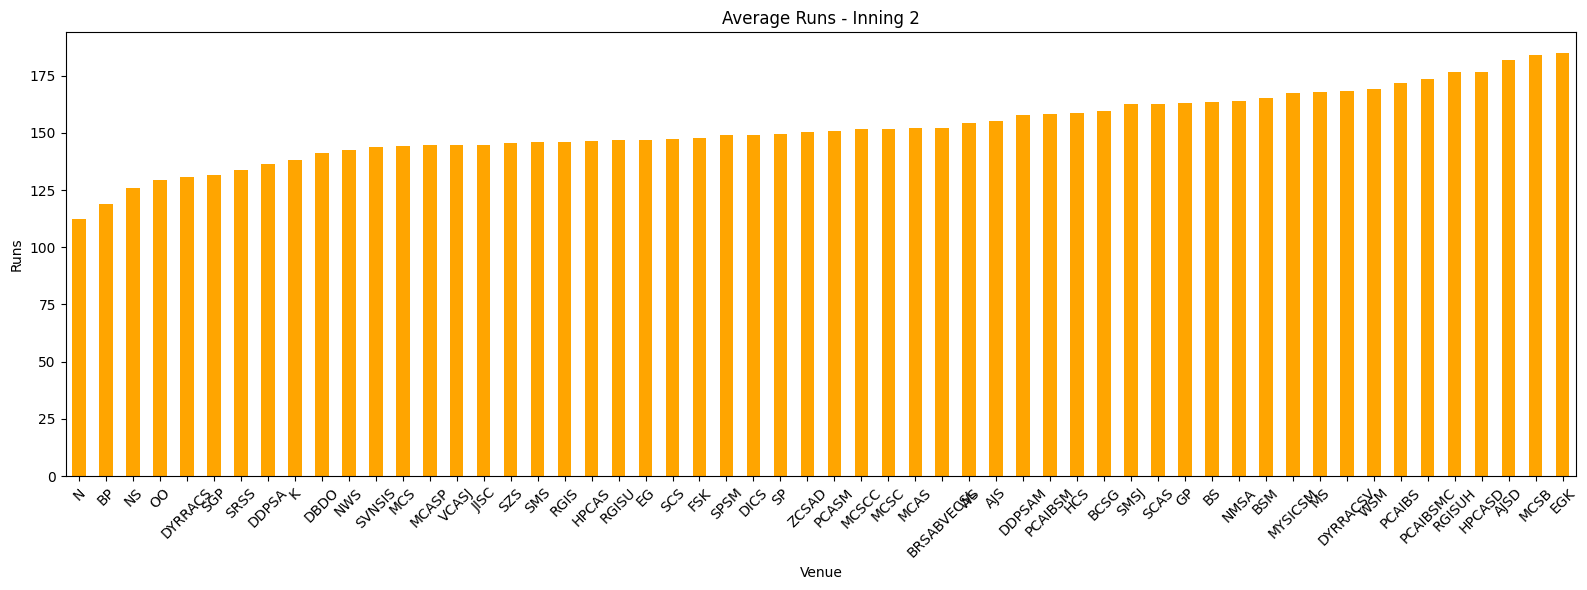

In [11]:
# Separate runs by innings for each match
match_inning_runs = aggregated_data.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()

# Merge with match_data to get the venue information
match_inning_runs = match_inning_runs.merge(match_data[['id', 'venue']], left_on='match_id', right_on='id', how='left')

# Create a function to get initials
def get_initials(venue):
    return ''.join(word[0] for word in venue.split())

print("Venue Name\t\t\t\tShortened Name")
print("-" * 100)
for venue in match_inning_runs['venue'].unique():
    print(f"{venue:<60} {get_initials(venue)}")

# Apply the function to venue names
match_inning_runs['venue_short'] = match_inning_runs['venue'].apply(get_initials)

# Calculate average runs for each stadium by inning
venue_inning_avg = match_inning_runs.groupby(['venue_short', 'inning'])['total_runs'].mean().reset_index()

# Pivot to get separate columns for each inning
venue_inning_pivot = venue_inning_avg.pivot(index='venue_short', columns='inning', values='total_runs').fillna(0)

# Plot for Inning 1
plt.figure(figsize=(16, 6))
venue_inning_pivot[1].sort_values().plot(kind='bar', color='blue')
plt.title('Average Runs - Inning 1')
plt.xlabel('Venue')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Inning 2
plt.figure(figsize=(16, 6))
venue_inning_pivot[2].sort_values().plot(kind='bar', color='orange')
plt.title('Average Runs - Inning 2')
plt.xlabel('Venue')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Over-wise Analysis

This section analyzes performance trends across overs in each inning.

### Average Runs per Over

We aggregate data by over and inning to calculate and plot the average runs per over.

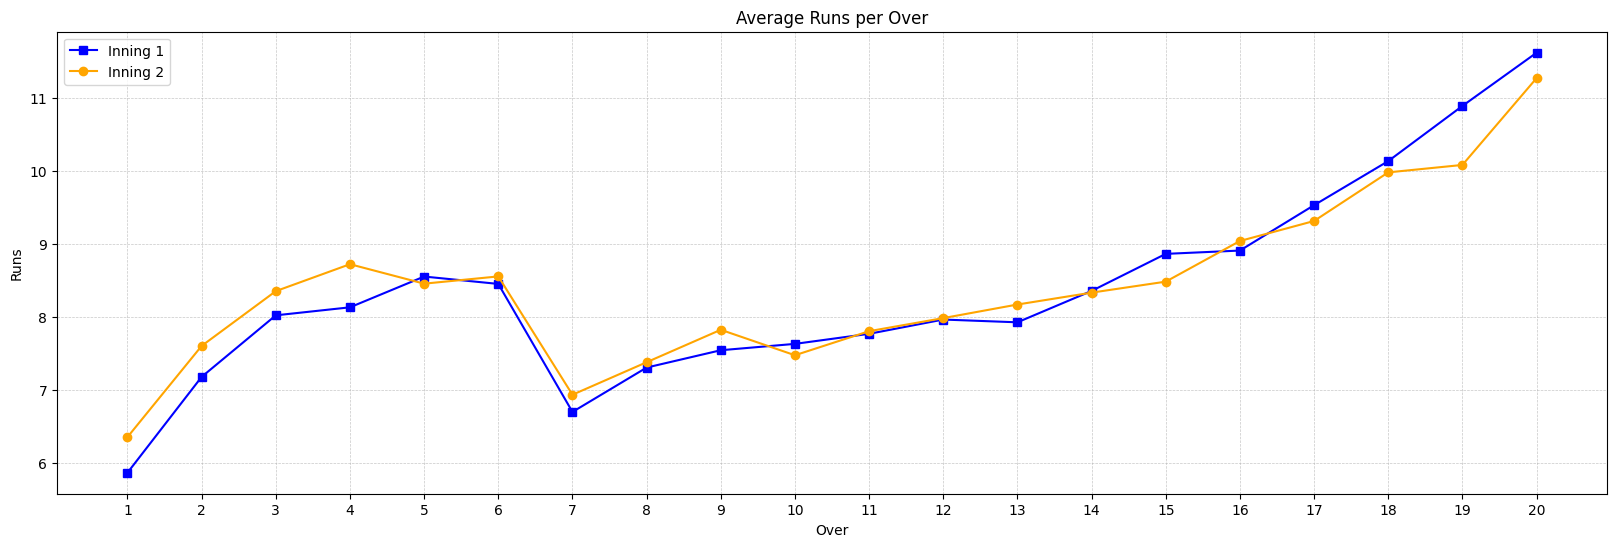

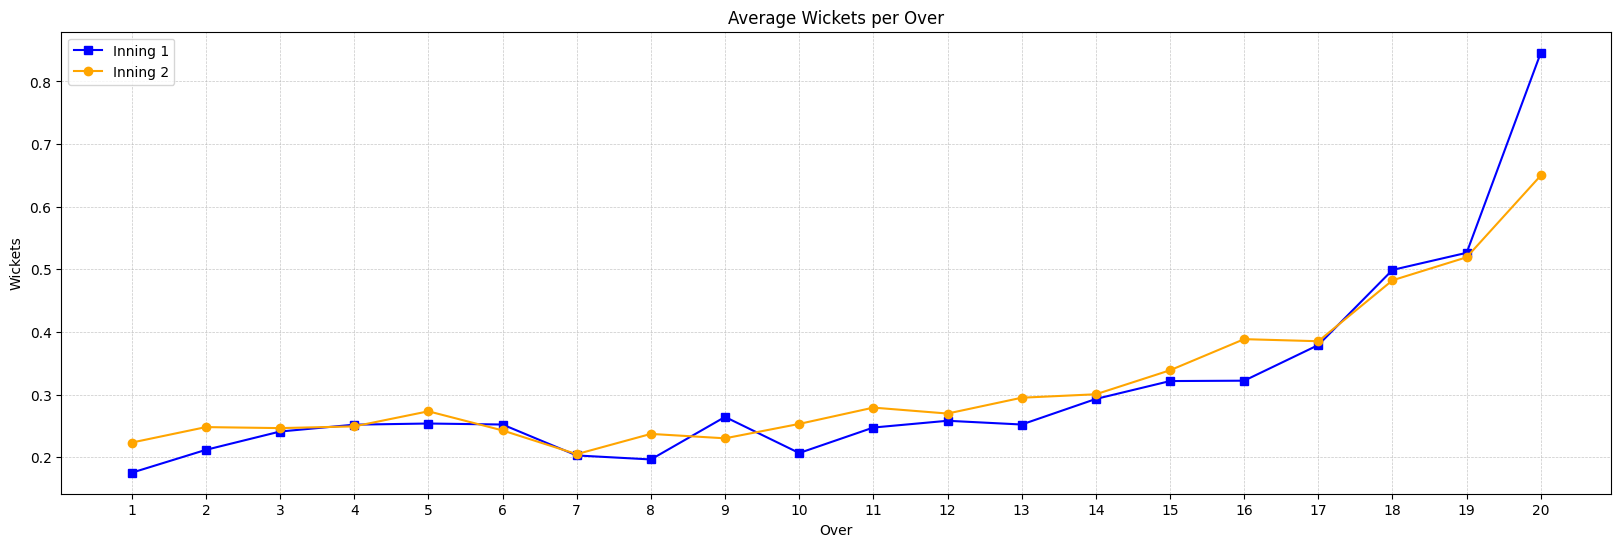

In [ ]:

over_data = ball_data.groupby(['match_id', 'inning', 'over']).agg({
    'total_runs': 'sum',
    'is_wicket': 'sum',
    'ball' : 'count'
}).reset_index()

# Filter only innings 1 and 2
over_data = over_data[over_data['inning'].isin([1, 2])]

# over_data = over_data[((over_data['ball'] >= 3) & (over_data['inning'].isin([2]))) | (over_data['inning'].isin([1]))]

over_data['total_runs'] = np.where(over_data['ball'] < 6, over_data['total_runs']*6/over_data['ball'], over_data['total_runs'])

# Calculate average runs per over
runs_per_over = over_data.groupby(['inning', 'over'])['total_runs'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(20, 6))
plt.plot(runs_per_over[runs_per_over['inning'] == 1]['over'] + 1, 
        runs_per_over[runs_per_over['inning'] == 1]['total_runs'], 
        marker='s', label='Inning 1', color='blue')
plt.plot(runs_per_over[runs_per_over['inning'] == 2]['over'] + 1, 
        runs_per_over[runs_per_over['inning'] == 2]['total_runs'], 
        marker='o', label='Inning 2', color='orange')
plt.title('Average Runs per Over')
plt.xlabel('Over')
plt.ylabel('Runs')
plt.xscale('linear')
plt.xticks(np.arange(1, 21))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()



# Calculate average runs per over
wicket_per_over = over_data.groupby(['inning', 'over'])['is_wicket'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(20, 6))
plt.plot(wicket_per_over[wicket_per_over['inning'] == 1]['over'] + 1, 
        wicket_per_over[wicket_per_over['inning'] == 1]['is_wicket'], 
        marker='s', label='Inning 1', color='blue')
plt.plot(wicket_per_over[wicket_per_over['inning'] == 2]['over'] + 1, 
        wicket_per_over[wicket_per_over['inning'] == 2]['is_wicket'], 
        marker='o', label='Inning 2', color='orange')
plt.title('Average Wickets per Over')
plt.xlabel('Over')
plt.ylabel('Wickets')
plt.xscale('linear')
plt.xticks(np.arange(1, 21))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()



# over_data['season'] = over_data['match_id'].map(match_data.set_index('id')['season'])

# uniq_s = over_data['season'].unique()

# # Filter only innings 1 and 2
# over_data = over_data[over_data['inning'].isin([1, 2])]

# # over_data = over_data[((over_data['ball'] >= 3) & (over_data['inning'].isin([2]))) | (over_data['inning'].isin([1]))]

# over_data['total_runs'] = over_data['total_runs']*6/over_data['ball']

# # Calculate average runs per over
# runs_per_over_s = over_data.groupby(['inning', 'over','season'])['total_runs'].mean().reset_index()

# for s in uniq_s:
#     runs_per_over = runs_per_over_s[runs_per_over_s['season'].isin([s])]
#     # Plotting the data
#     plt.figure(figsize=(20, 6))
#     plt.plot(runs_per_over[runs_per_over['inning'] == 1]['over'] + 1, 
#             runs_per_over[runs_per_over['inning'] == 1]['total_runs'], 
#             marker='s', label='Inning 1', color='blue')
#     plt.plot(runs_per_over[runs_per_over['inning'] == 2]['over'] + 1, 
#             runs_per_over[runs_per_over['inning'] == 2]['total_runs'], 
#             marker='o', label='Inning 2', color='orange')
#     plt.title(f'Average Runs per Over - {s}')
#     plt.xlabel('Over')
#     plt.ylabel('Runs')
#     plt.xscale('linear')
#     plt.xticks(np.arange(1, 21))
#     plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
#     plt.legend()
#     plt.show()

### Over Occurrences

We count the unique occurrences of each over in both innings and visualize them with bar charts and peak lines.

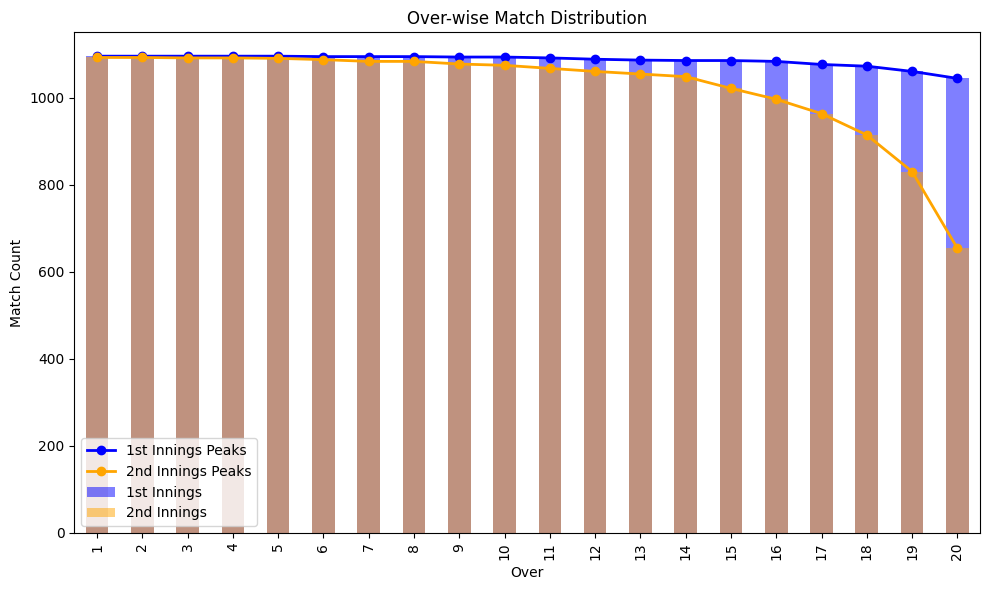

In [13]:
first_innings = ball_data[ball_data['inning'] == 1]
second_innings = ball_data[ball_data['inning'] == 2]

unique_over_first = first_innings[['match_id', 'over']].drop_duplicates().groupby('over').size()
unique_over_second = second_innings[['match_id', 'over']].drop_duplicates().groupby('over').size()

# Shift the over values from 0–19 to 1–20
unique_over_first.index = unique_over_first.index + 1
unique_over_second.index = unique_over_second.index + 1

plt.figure(figsize=(10, 6))
ax = unique_over_first.plot(kind='bar', color='blue', alpha=0.5, label='1st Innings')
unique_over_second.plot(kind='bar', color='orange', alpha=0.5, label='2nd Innings', ax=ax)

# Plot lines connecting peaks for each innings
plt.plot(unique_over_first.index-1, unique_over_first.values, color='blue', marker='o', linestyle='-', linewidth=2, label='1st Innings Peaks')
plt.plot(unique_over_second.index-1, unique_over_second.values, color='orange', marker='o', linestyle='-', linewidth=2, label='2nd Innings Peaks')

plt.xlabel('Over')
plt.ylabel('Match Count')
plt.title('Over-wise Match Distribution')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Win Type Analysis

We determine whether teams batting first or bowling first win more often based on toss decisions and match outcomes.

### Analyzing Win Types

We identify batting and bowling teams from toss decisions, determine the winner type, and plot the results.

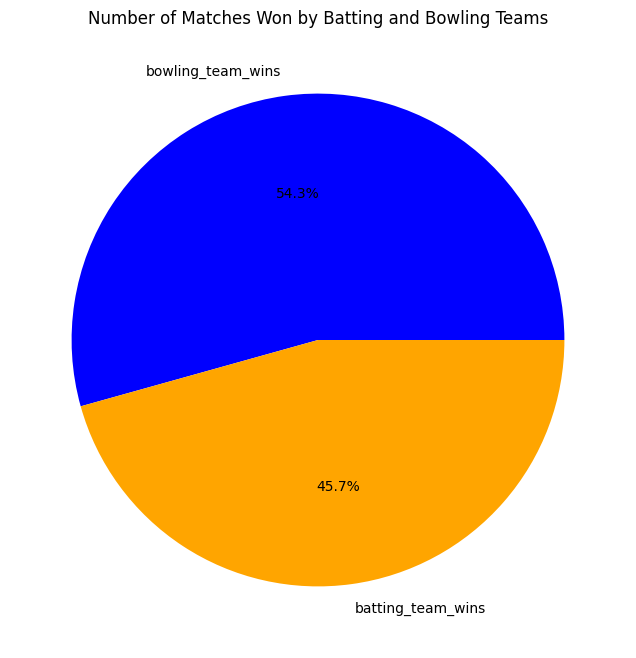

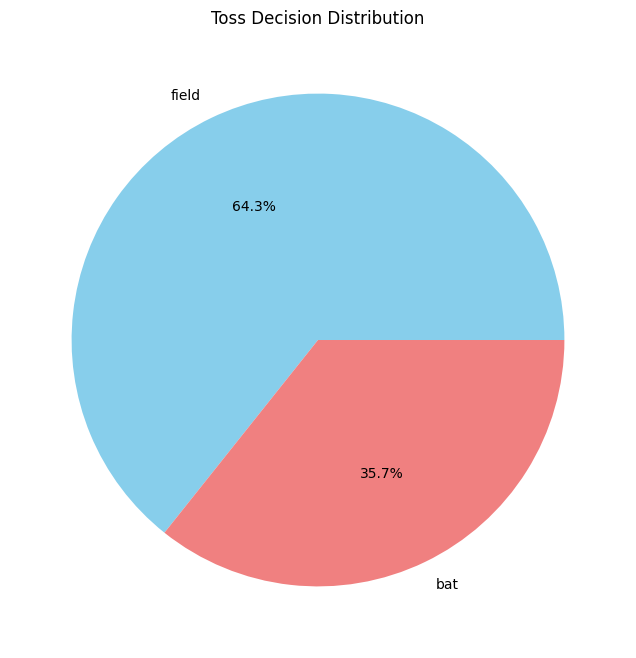

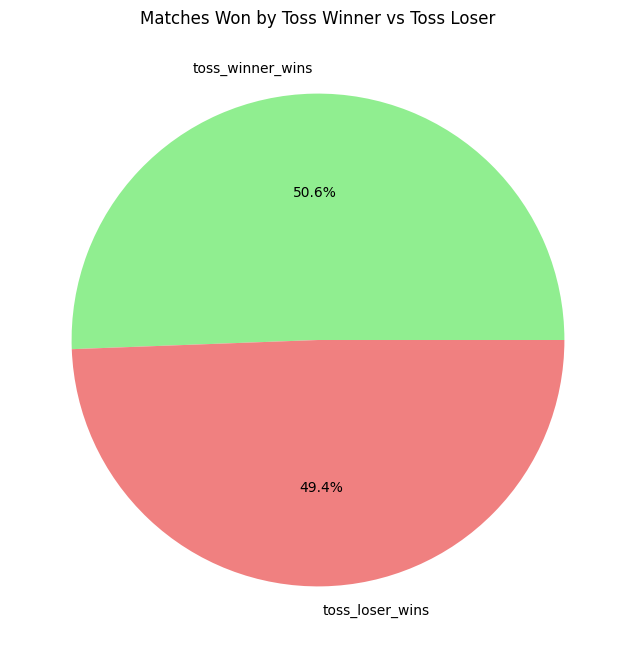

win_type
bowling_team_wins    595
batting_team_wins    500
Name: count, dtype: int64
toss_decision
field    704
bat      391
Name: count, dtype: int64
toss_decider_wins
toss_winner_wins    554
toss_loser_wins     541
Name: count, dtype: int64


In [14]:
# Determine batting and bowling teams based on toss decision
match_data['batting_team'] = match_data.apply(
    lambda row: row['toss_winner'] if row['toss_decision'] == 'bat' else (row['team1'] if row['toss_winner'] == row['team2'] else row['team2']),
    axis=1
)
match_data['bowling_team'] = match_data.apply(
    lambda row: row['team1'] if row['batting_team'] == row['team2'] else row['team2'],
    axis=1
)

# Determine if the batting or bowling team won
match_data['winning_team'] = match_data['winner']
match_data['win_type'] = match_data.apply(
    lambda row: 'batting_team_wins' if row['winning_team'] == row['batting_team'] else 'bowling_team_wins',
    axis=1
)

# Count the number of wins for each type
win_counts = match_data['win_type'].value_counts()


# Plot the pie chart
win_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], figsize=(8, 8))
plt.title('Number of Matches Won by Batting and Bowling Teams')
plt.ylabel('')
plt.show()

toss_decision_counts = match_data['toss_decision'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
toss_decision_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Toss Decision Distribution')
plt.ylabel('')
plt.show()

# Determine toss decider winning
match_data['toss_decider_wins'] = match_data.apply(
    lambda row: 'toss_winner_wins' if row['toss_winner'] == row['winner'] else 'toss_loser_wins',
    axis=1
)

# Count the number of wins for each type
toss_win_counts = match_data['toss_decider_wins'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
toss_win_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Matches Won by Toss Winner vs Toss Loser')
plt.ylabel('')
plt.show()

print(win_counts)
print(toss_decision_counts)
print(toss_win_counts)
